In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

$x_k=-5+k\frac{10}{n}$\
$y_k=\frac{1}{1+x_k^2}$\
$n=4...15$\
$k=0...n$

In [11]:
def get_x_y(n):
	k = np.arange(n + 1)
	x_k = lambda k, n: -5 + k * (10 / n)
	y_k = lambda k, n: 1 / (1 + x_k(k, n) ** 2)
	return x_k(k, n), y_k(k, n)

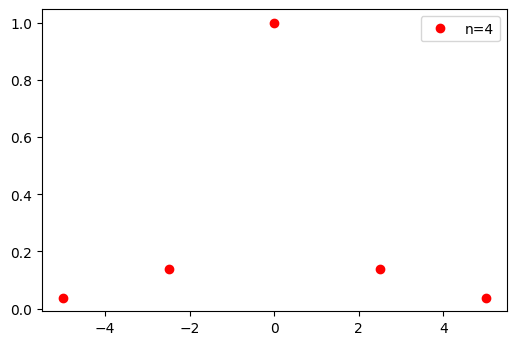

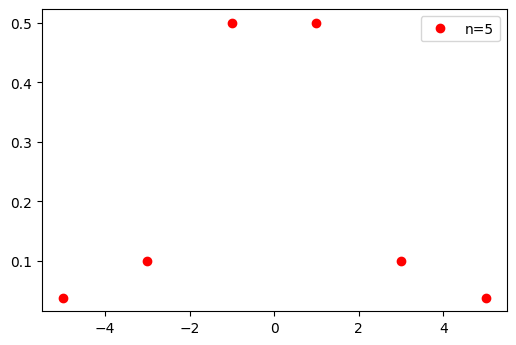

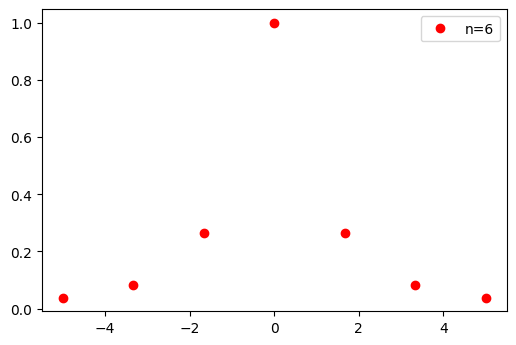

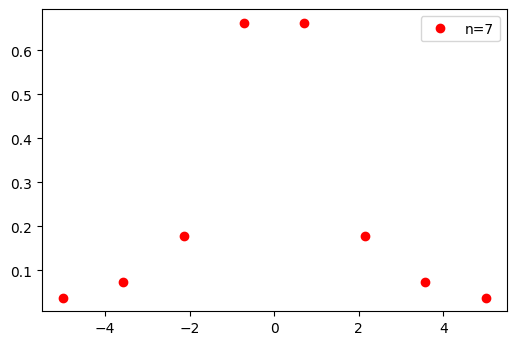

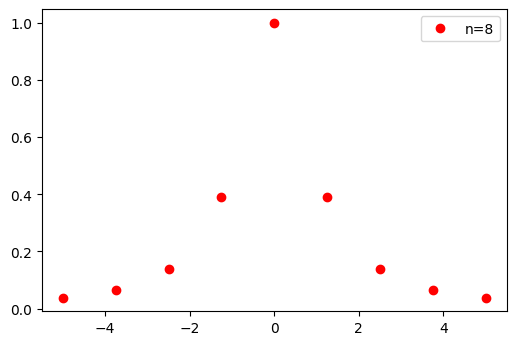

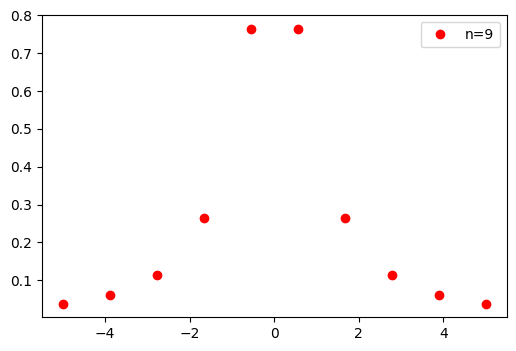

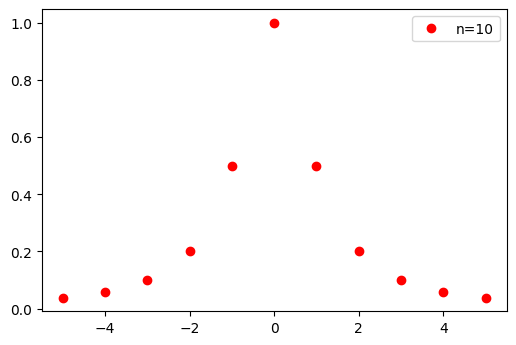

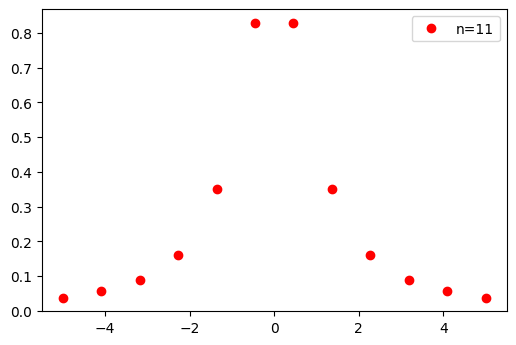

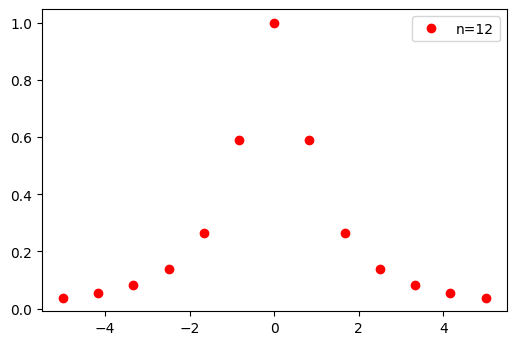

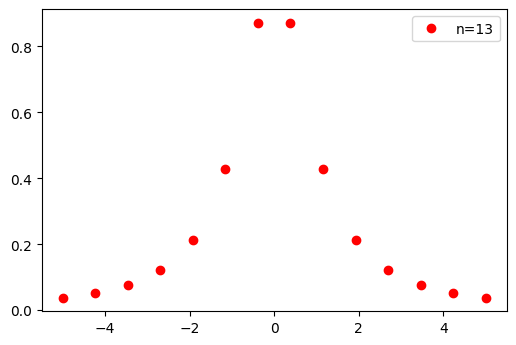

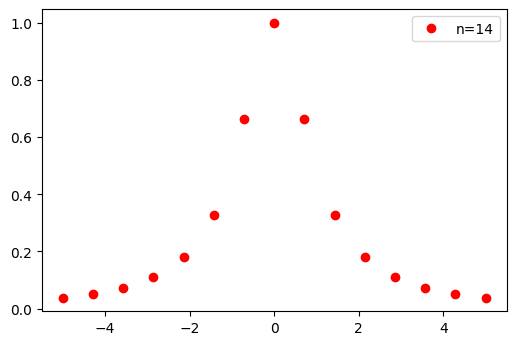

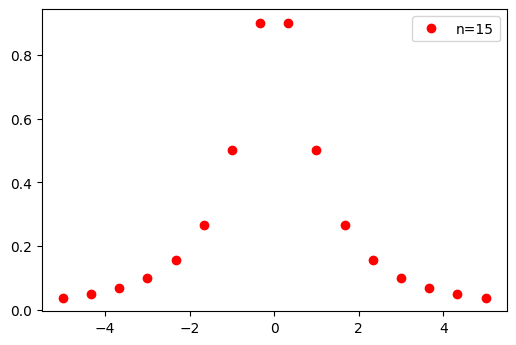

In [12]:
for n in range(4, 16):
	x, y = get_x_y(n)
	plt.plot(x, y, 'or', label='n=' + str(n))
	plt.legend(loc='best')
	plt.show()

# Лагранж
$l_i(x)=\prod_{0\leq j \leq n, j\neq i}(x-x_j)$ \
$P_n(x) =\sum_{i=0}^n y(x_i) \cdot \frac{l_i(x)}{l_i(x_i)}$

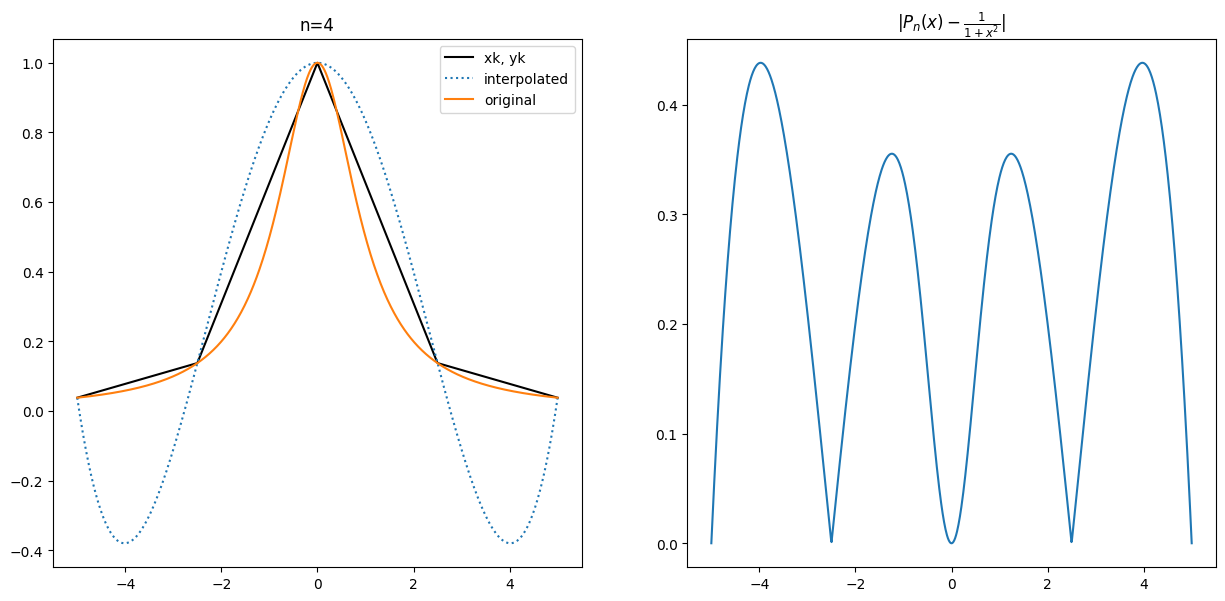

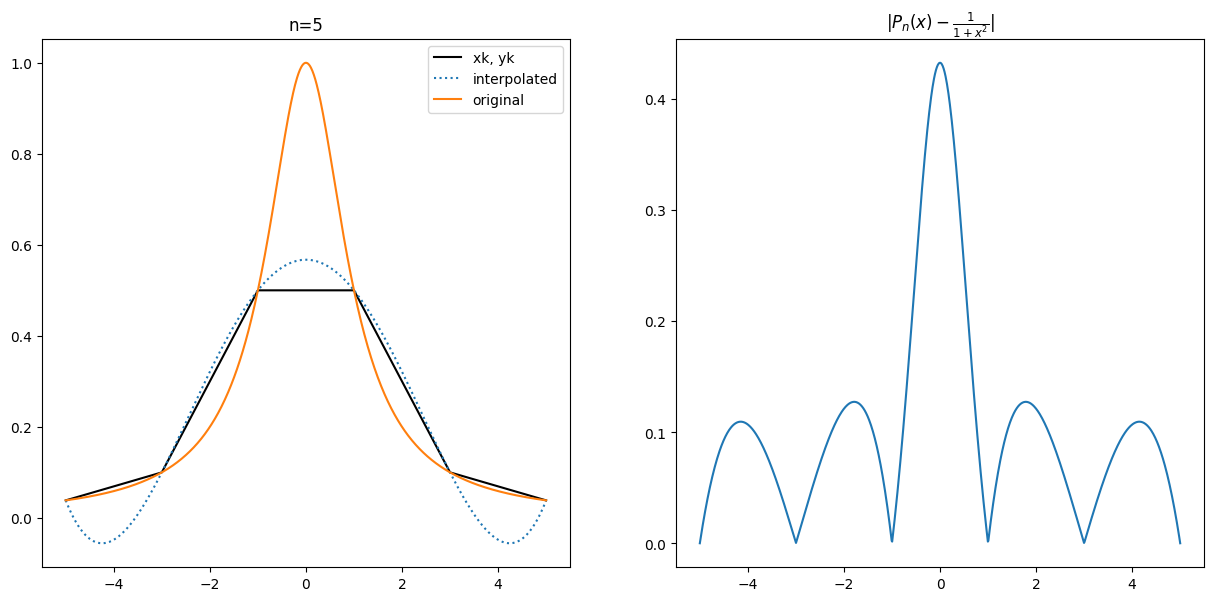

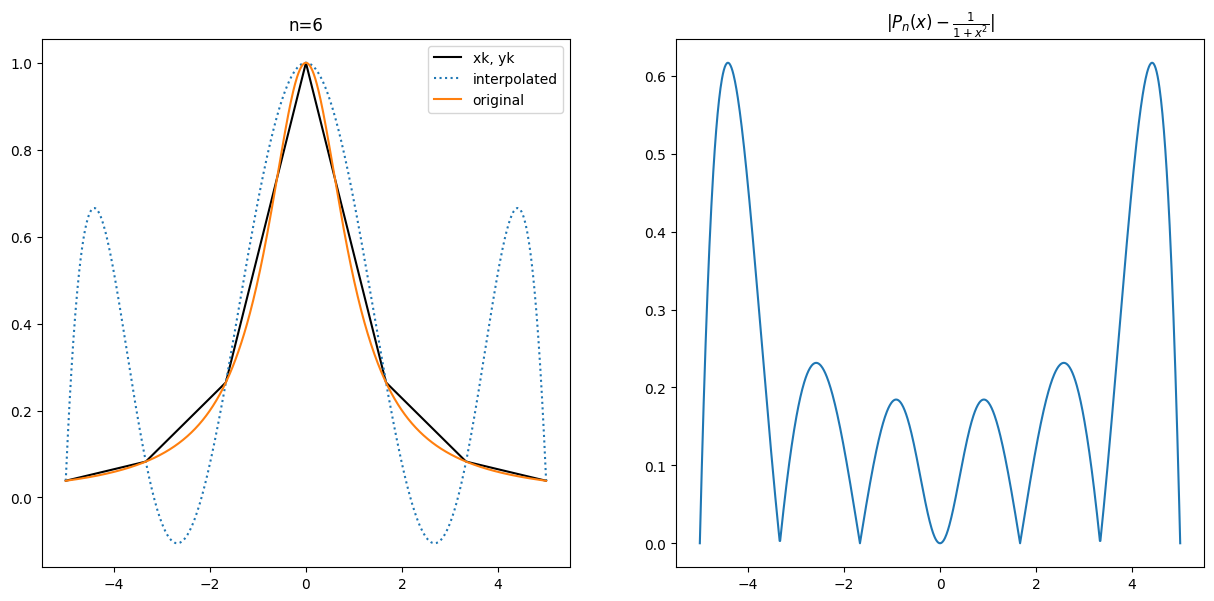

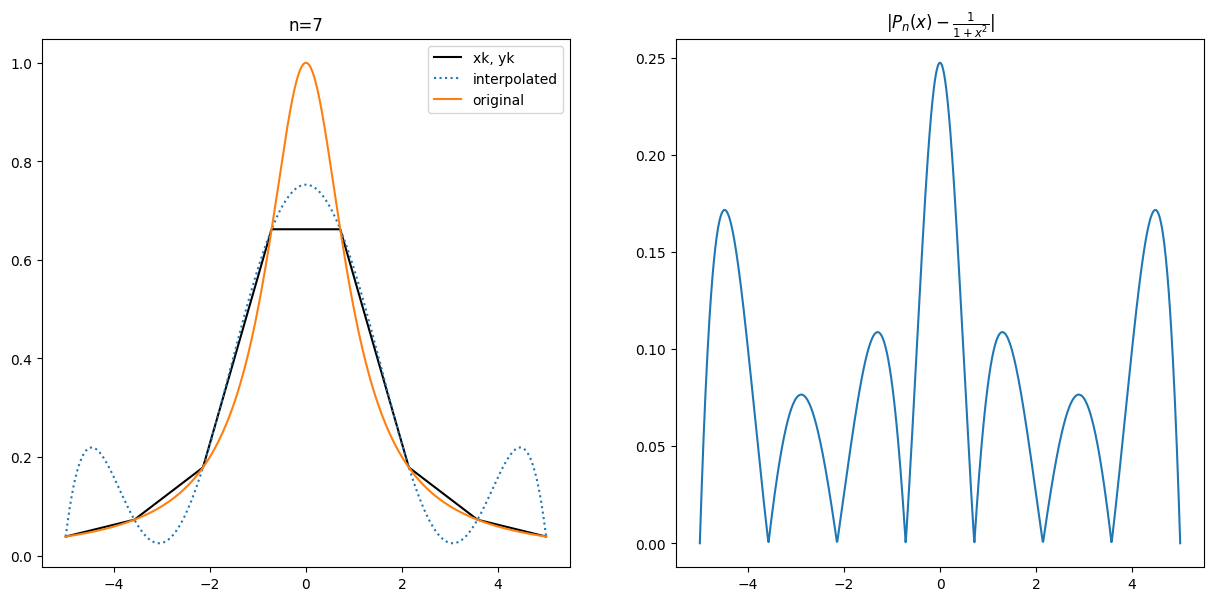

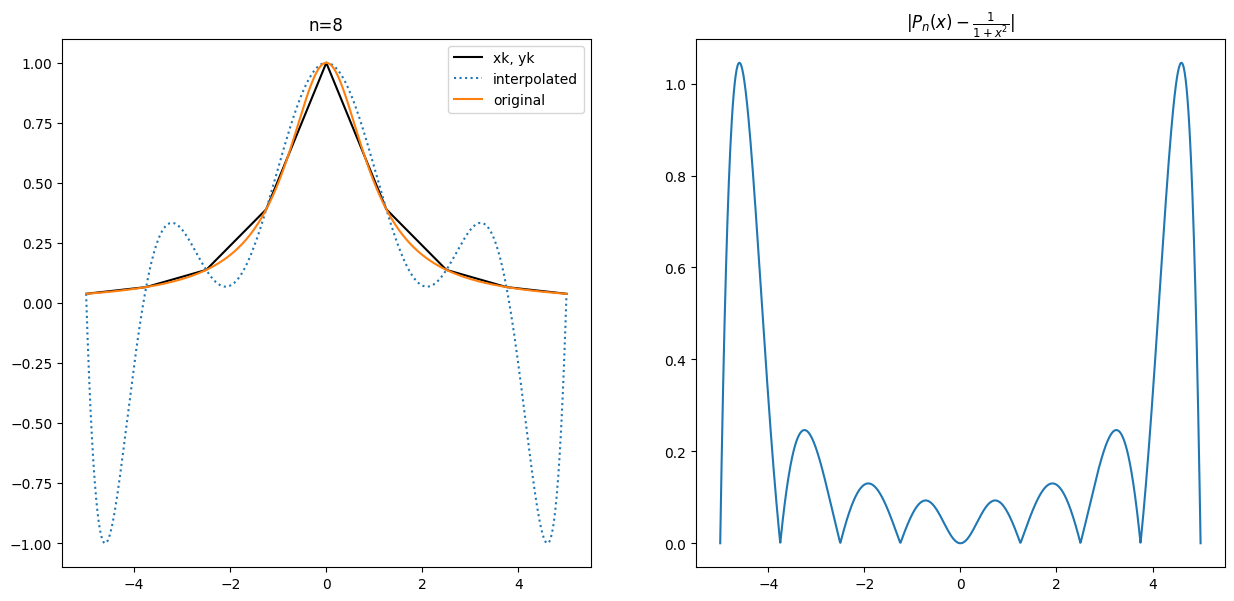

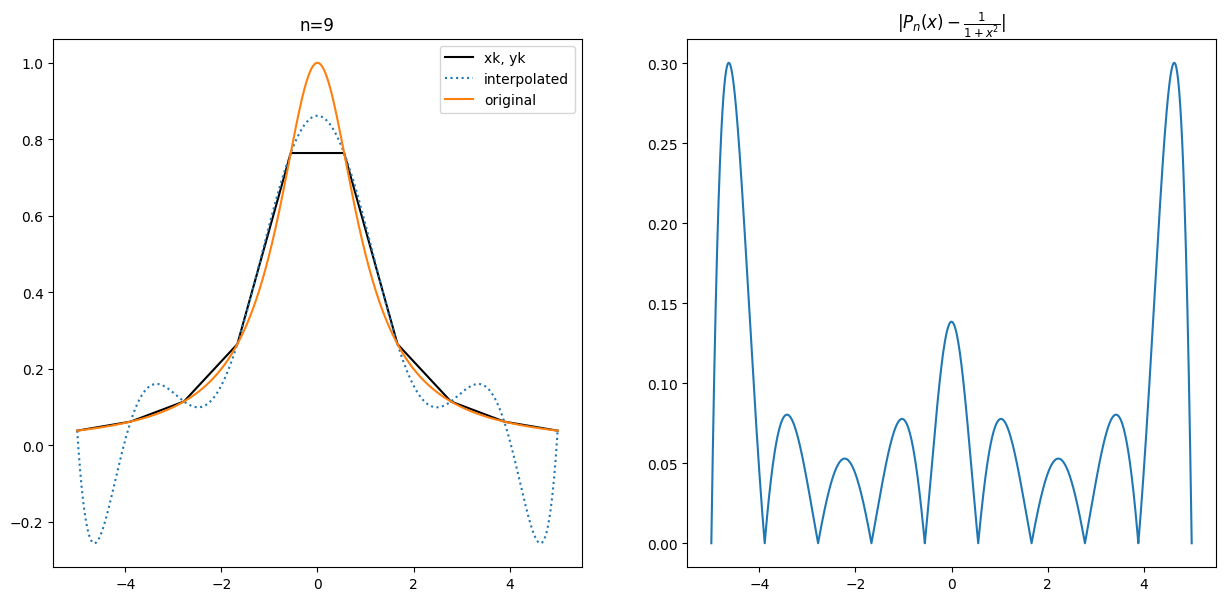

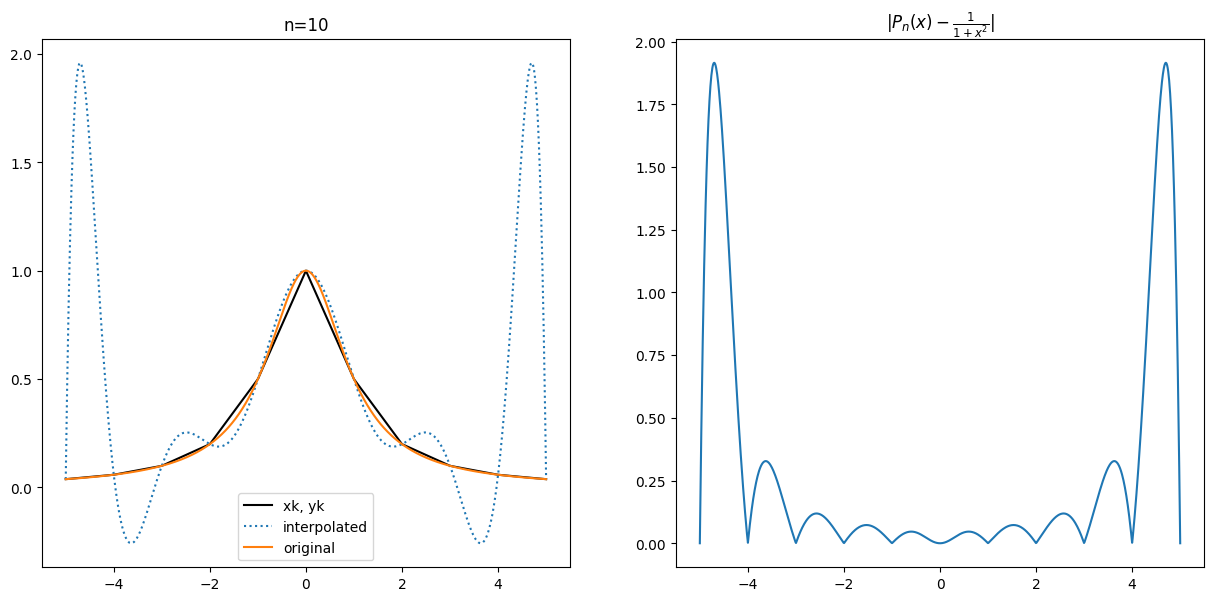

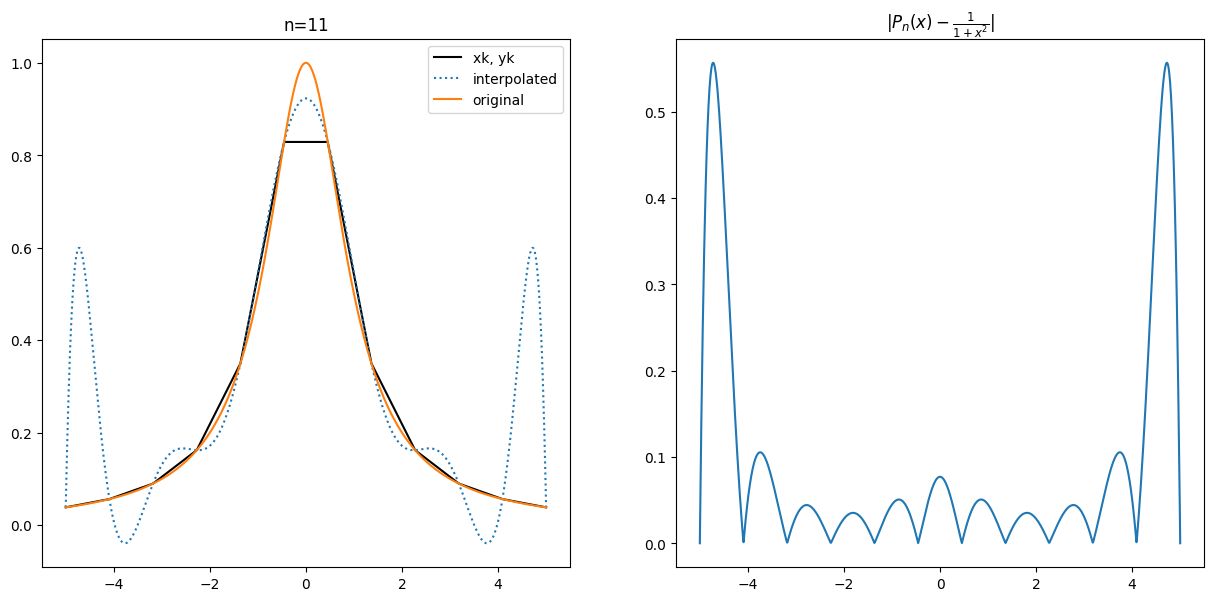

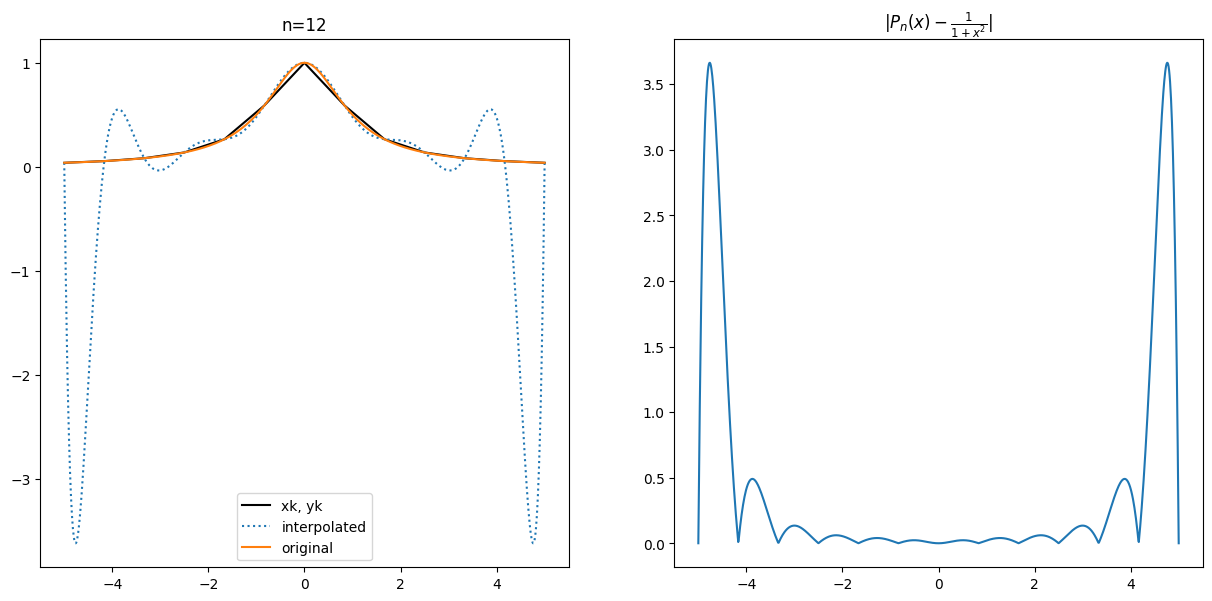

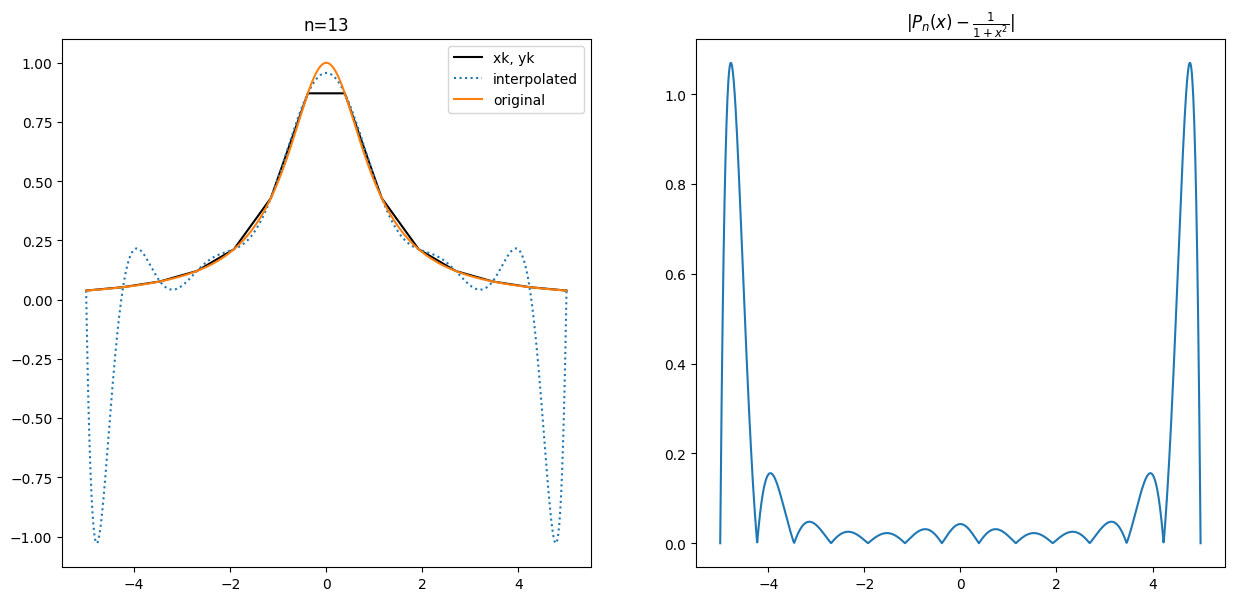

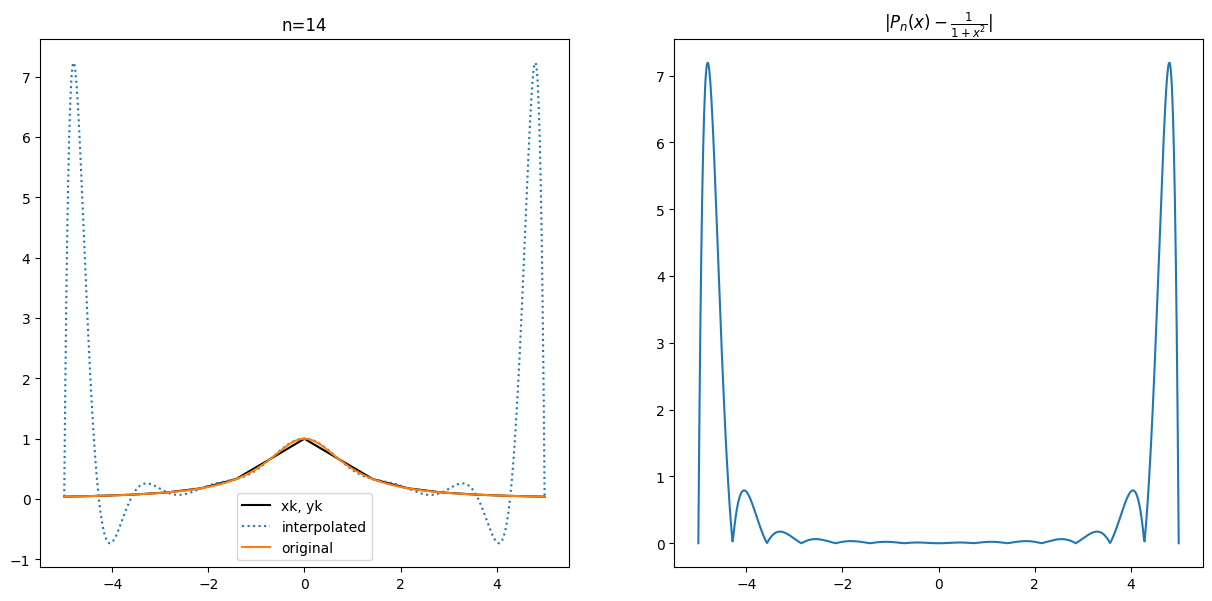

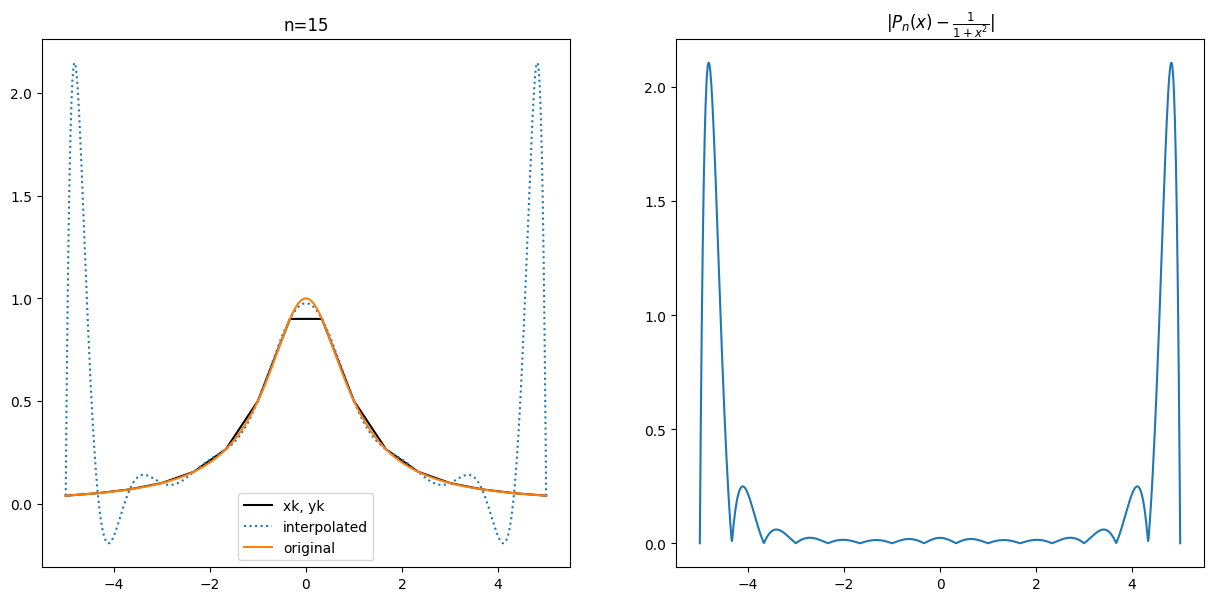

In [13]:
for n in range(4, 16):
	fg, ax = plt.subplots(1, 2, figsize=(15, 7))
	X, Y = get_x_y(n)
	l = lambda x, i: np.prod([(x - X[j]) for j in range(X.size) if j != i])
	P = lambda x: np.sum([Y[i] * (l(x, i)) / (l(X[i], i)) for i in range(X.size)])
	x_dimension = np.linspace(X[0], X[-1], 1000)
	interpolated = np.vectorize(P)(x_dimension)
	original_function = np.vectorize(lambda x: 1 / (1 + x ** 2))(x_dimension)
	ax[0].plot(X, Y, 'k', label='xk, yk')
	ax[0].plot(x_dimension, interpolated, linestyle=':', label='interpolated')
	ax[0].plot(x_dimension, original_function, label='original')
	ax[0].set_title('n=' + str(n))
	ax[1].plot(x_dimension, np.abs(interpolated - original_function))
	ax[1].set_title(r'$|P_n(x) - \frac{1}{1+x^2}|$')
	ax[0].legend()
	plt.show()

# Ньютон
Воспользуемся схемой Горнера

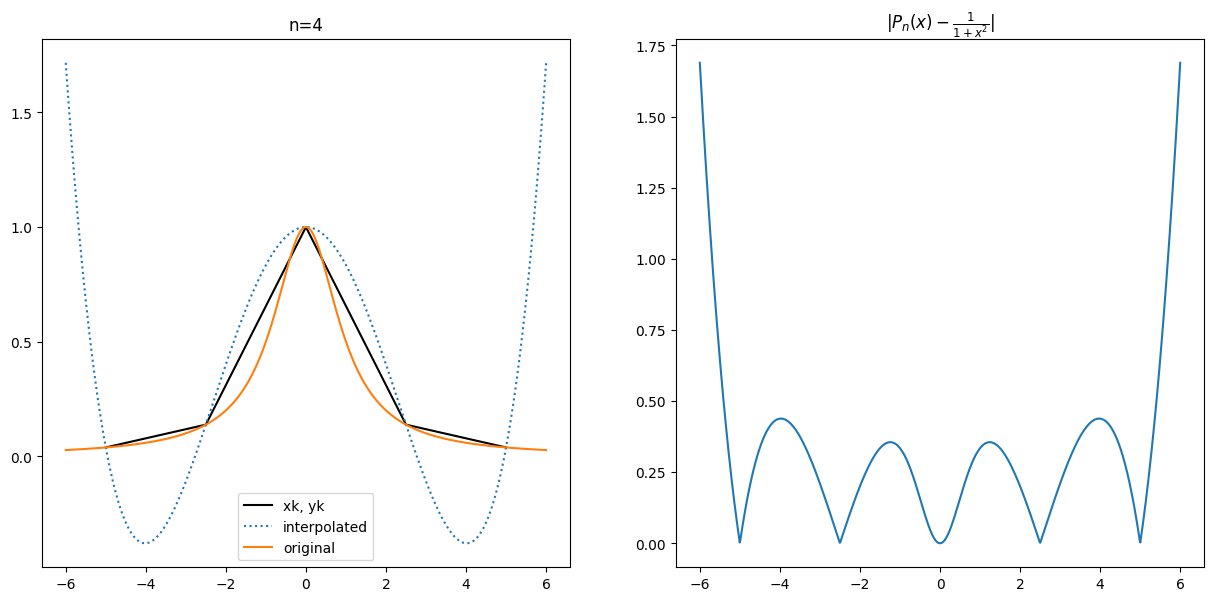

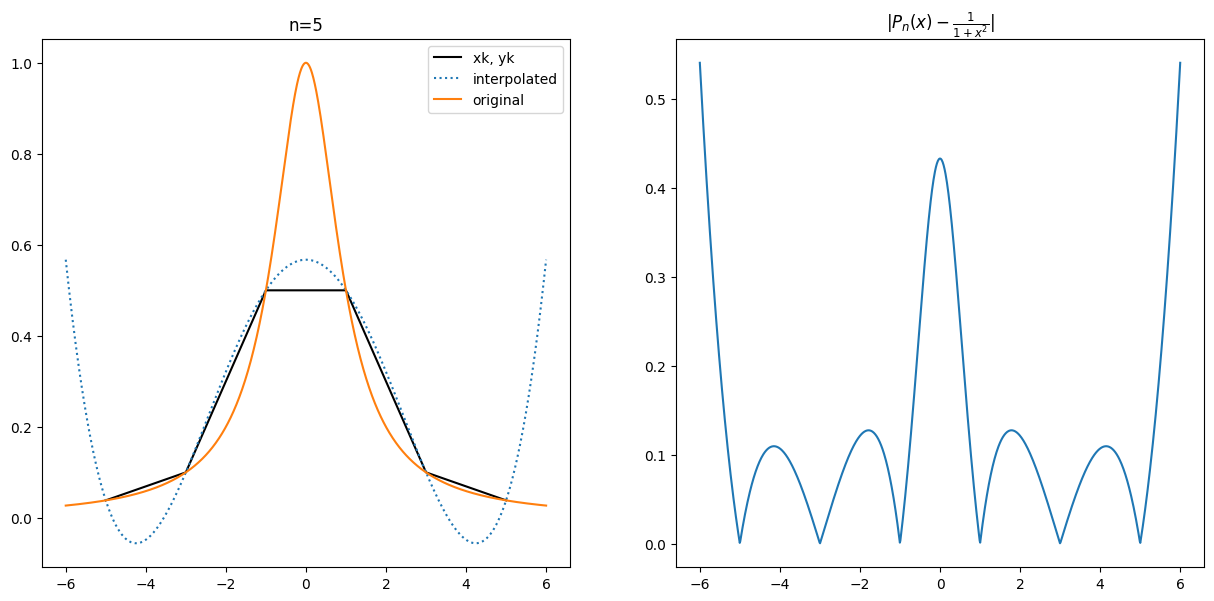

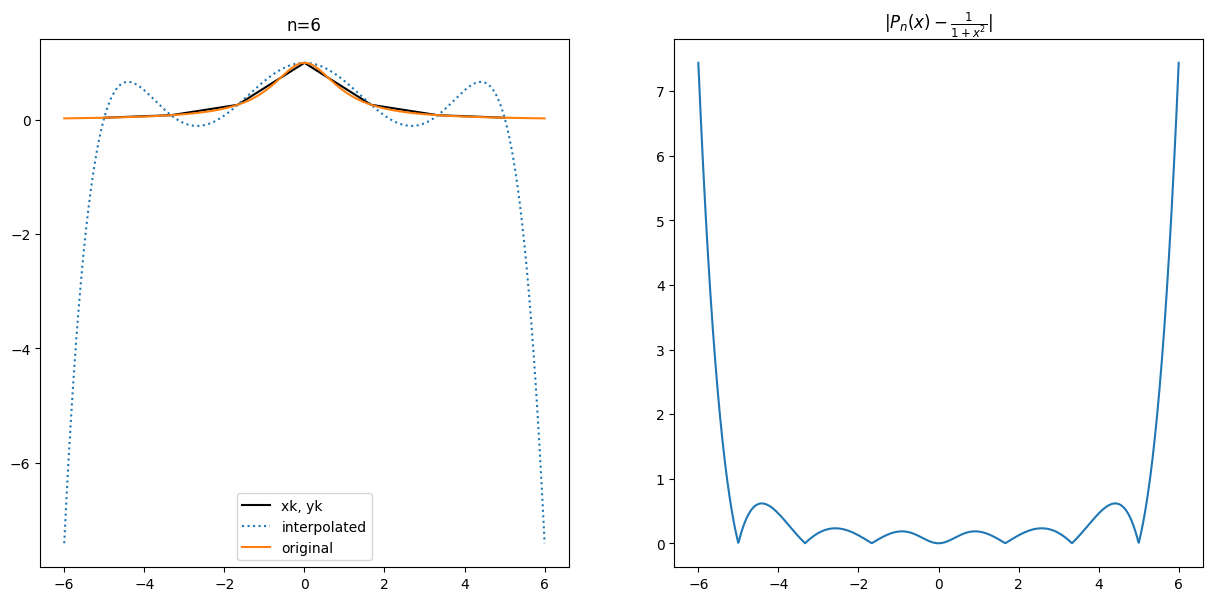

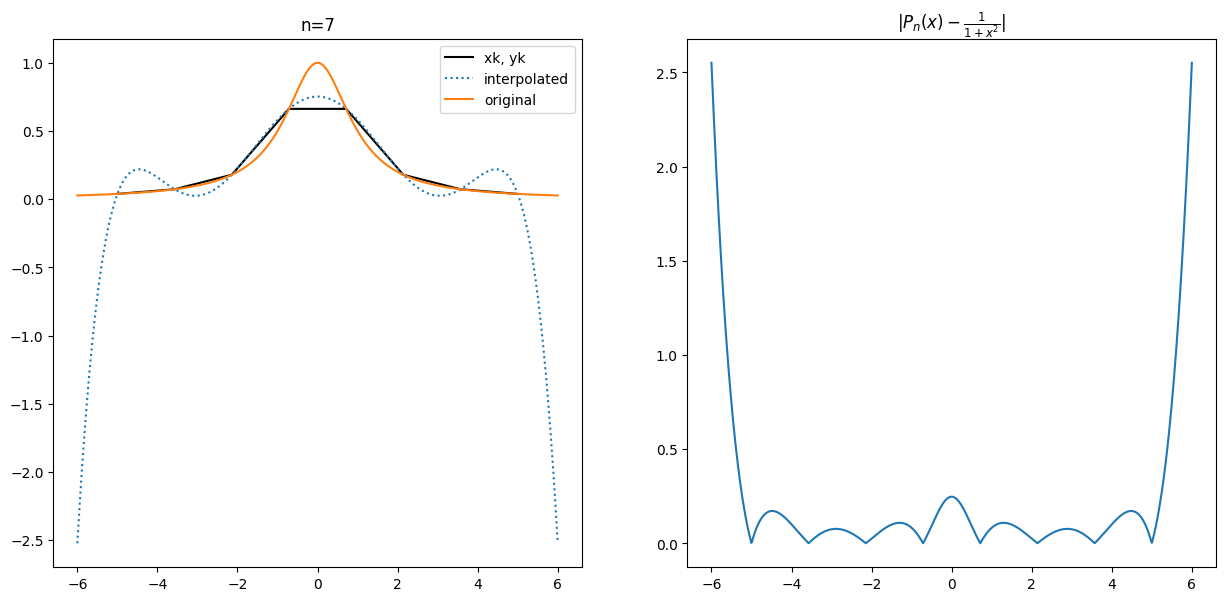

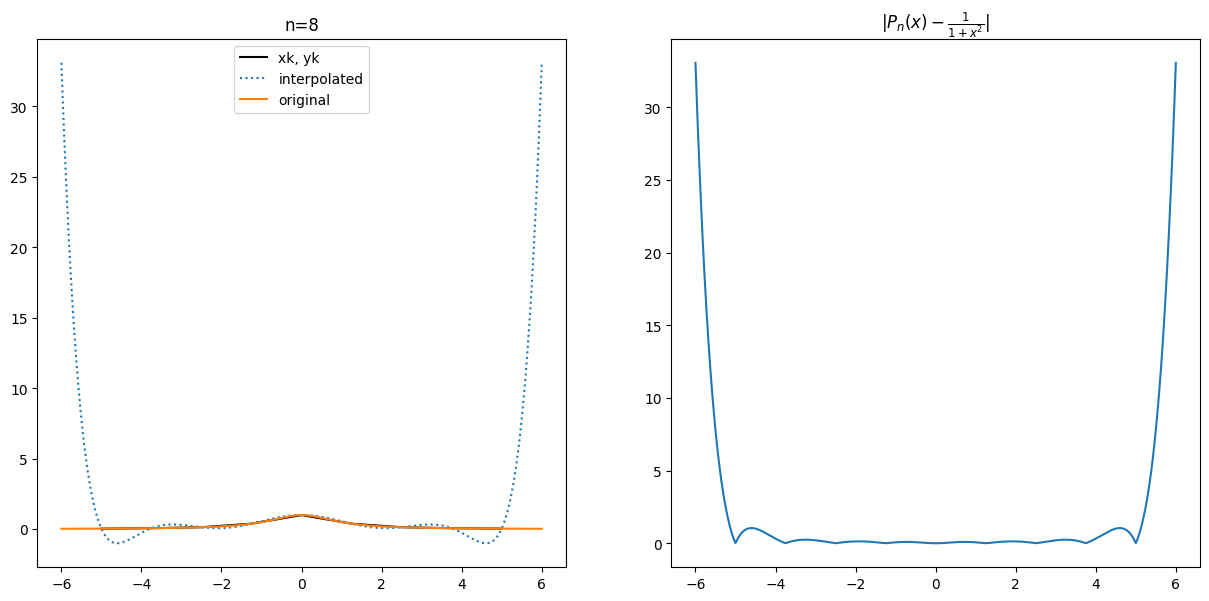

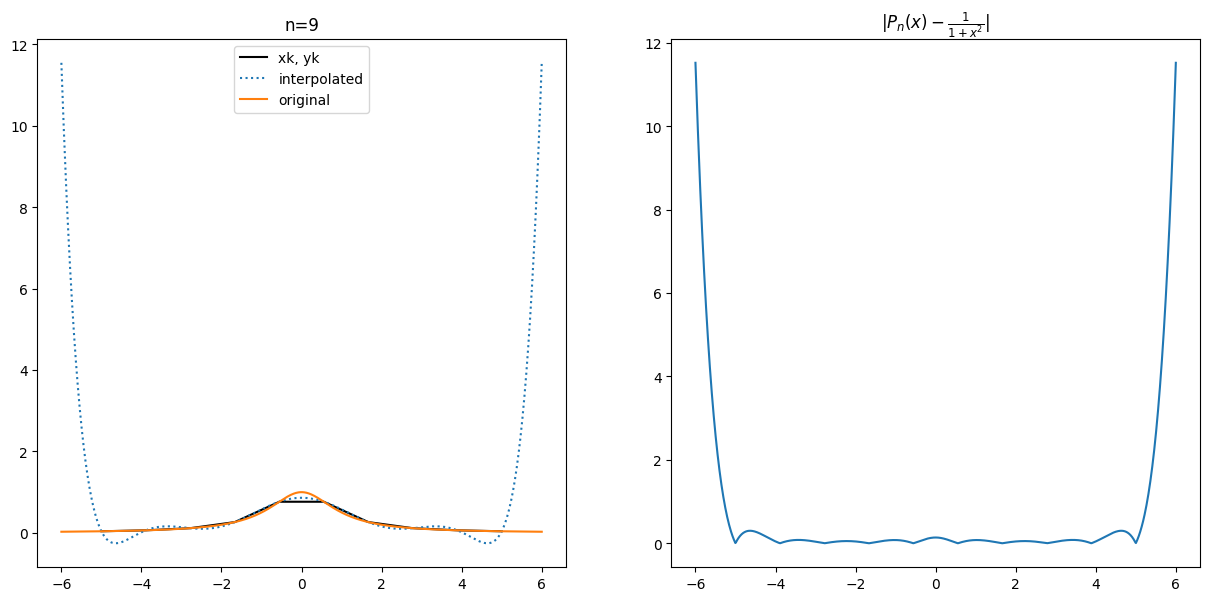

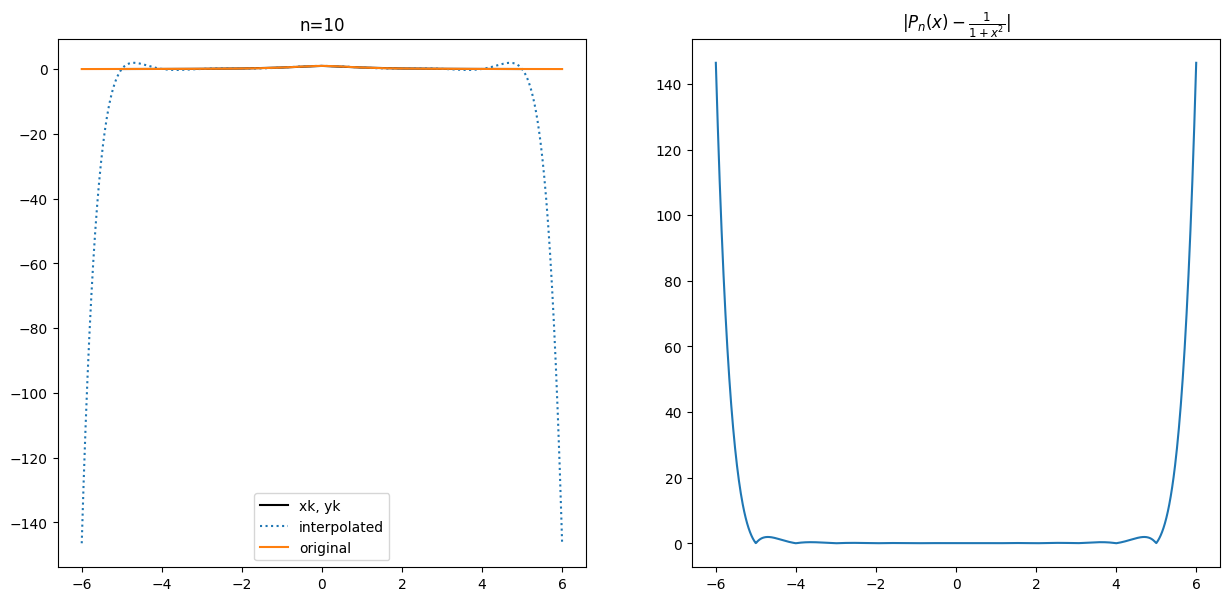

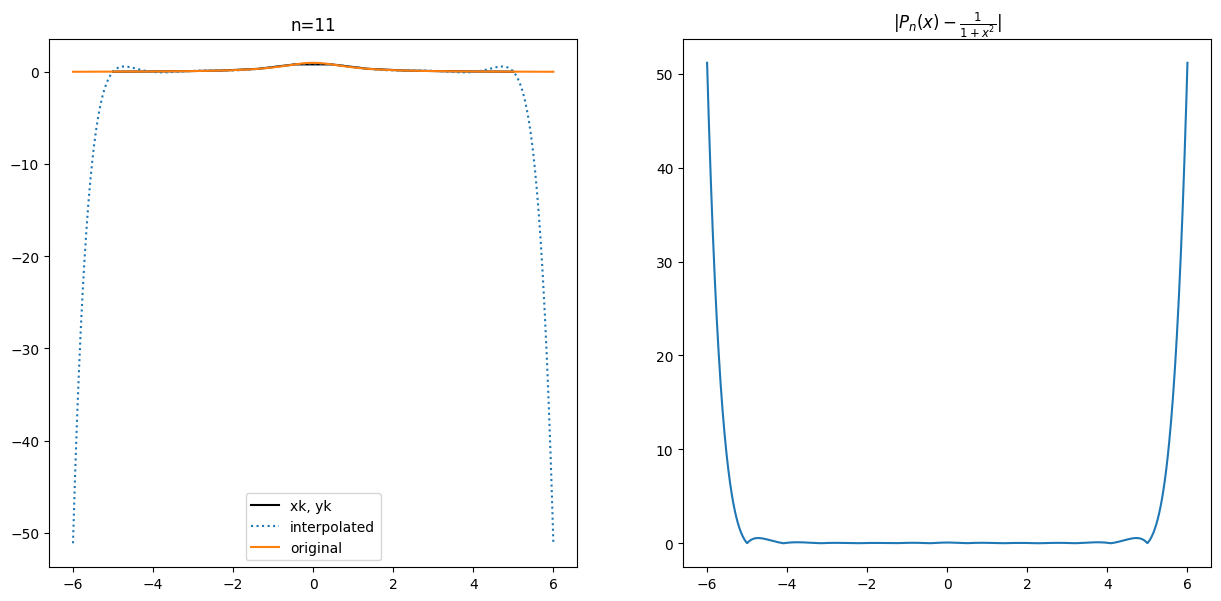

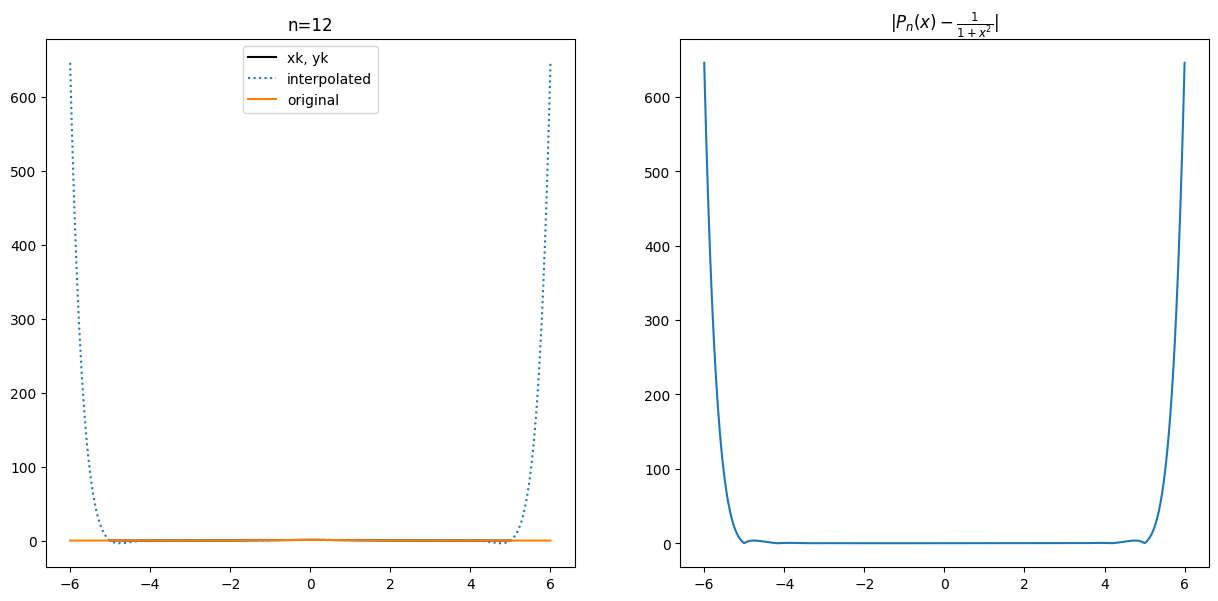

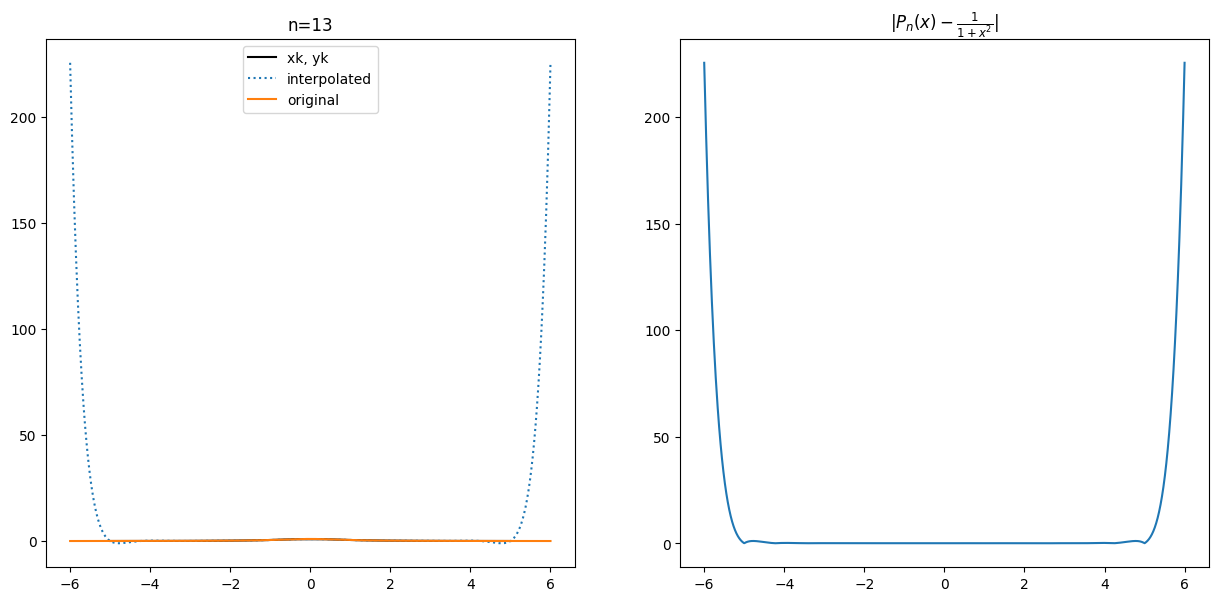

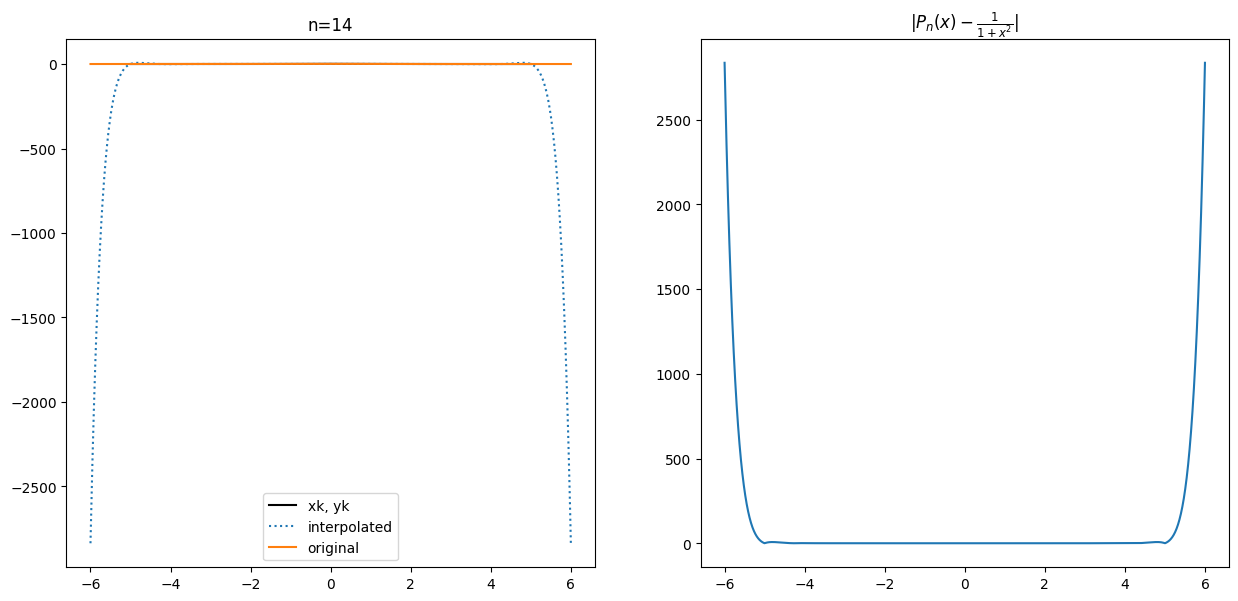

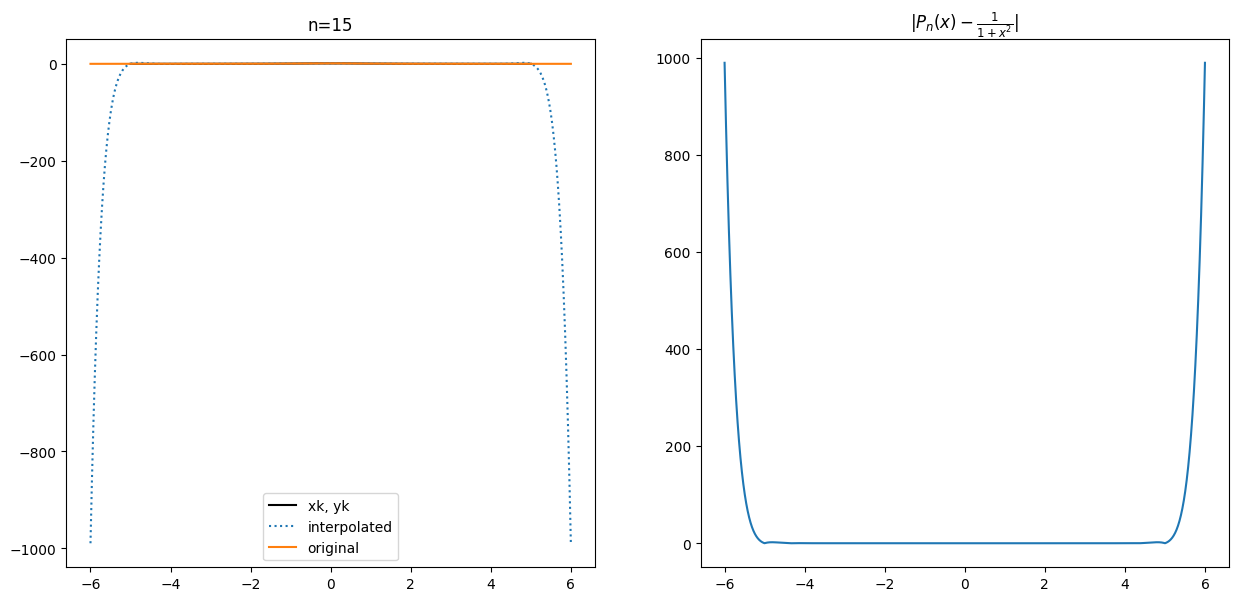

In [14]:
def find_coefficients(X, Y):
	n = X.size
	A = np.zeros((n, n + 1))
	A[:, 0] = X[:]
	A[:, 1] = Y[:]

	for j in range(2, n + 1):
		for i in range(j - 1, n):
			A[i, j] = (A[i, j - 1] - A[i - 1, j - 1]) / (A[i, 0] - A[i - j + 1, 0])

	p = np.zeros(n)
	for k in range(n):
		p[k] = A[k, k + 1]

	return p

def newton(x, X, Y):
	p = find_coefficients(X, Y)
	n = X.size
	res = p[n - 1]
	for i in range(n - 2, -1, -1):
		res = res * (x - X[i]) + p[i]
	return res


for n in range(4, 16):
	fg, ax = plt.subplots(1, 2, figsize=(15, 7))
	X, Y = get_x_y(n)
	# X = np.concatenate([X, [-5 + (n+1) * 10 / n]])
	# Y = np.concatenate([Y, [1 / (1 + X[-1] ** 2)]])
	x_dimension = np.linspace(-6, 6, 1000)
	p = newton(x_dimension, X, Y)
	original_function = np.vectorize(lambda x: 1 / (1 + x ** 2))(x_dimension)
	ax[0].plot(X, Y, 'k', label='xk, yk')
	ax[0].plot(x_dimension, p, linestyle=':', label='interpolated')
	ax[0].plot(x_dimension, original_function, label='original')
	ax[0].set_title('n=' + str(n))
	ax[1].plot(x_dimension, np.abs(p - original_function))
	ax[1].set_title(r'$|P_n(x) - \frac{1}{1+x^2}|$')
	ax[0].legend()
	plt.show()